# 6.4 Supervised Machine Leaning with Linear Regression Algorithms 

## This script contains the following:
### 1. Importing libraries and data
### 2. Data cleaning
### 3. Data prep for regression analysis
### 4. Regression analysis

## 01. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Create path
path = r'C:\Users\Quinn\Documents\CF - Data Analysis\Data Immersion\Achieve 6\AirBnB in Europe cities Project'

In [4]:
# Import the dataset
airbnb = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'airbnb_clean.pkl'))

## 02. Data cleaning (if required)

In [5]:
airbnb.head()

,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi_listing,business_listing,cleanliness_rating,guest_satisfaction_overall,bedrooms,city_center_dist,metro_dist,attr_index_norm,rest_index_norm,weekday/weekend,city
0,296.159940,Private room,False,True,2.0,True,0,0,10.0,97.0,1,0.699821,0.193709,25.239380,71.608028,Weekday,Paris
1,288.237487,Private room,False,True,2.0,True,0,0,10.0,97.0,1,2.100005,0.107221,42.507907,58.791463,Weekday,Paris
2,211.343089,Private room,False,True,2.0,False,0,0,10.0,94.0,1,3.302325,0.234724,21.640840,53.051310,Weekday,Paris
3,298.956100,Entire home/apt,False,False,2.0,False,0,1,9.0,91.0,1,0.547567,0.195997,26.391291,70.463506,Weekday,Paris
4,247.926181,Entire home/apt,False,False,4.0,False,0,0,7.0,82.0,1,1.197921,0.103573,19.809165,62.918272,Weekday,Paris


In [6]:
airbnb.shape

(51707, 17)

In [7]:
airbnb.columns

Index(['price', 'room_type', 'room_shared', 'room_private', 'person_capacity',
       'host_is_superhost', 'multi_listing', 'business_listing',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms',
       'city_center_dist', 'metro_dist', 'attr_index_norm', 'rest_index_norm',
       'weekday/weekend', 'city'],
      dtype='object')

#### The data is already cleaned and has no duplicates or missing values.

### Extreme values check

C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

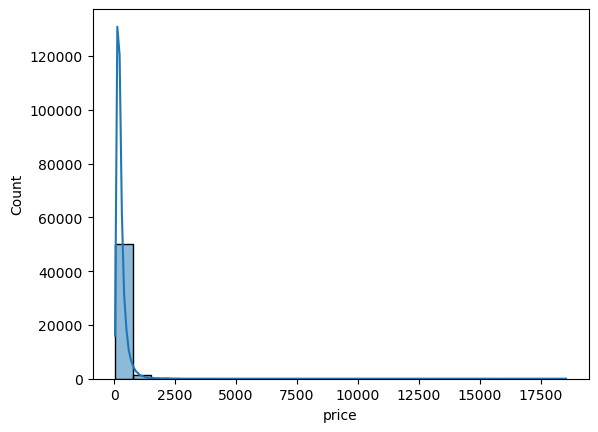

In [8]:
sns.histplot(airbnb['price'], bins = 25, kde = True) # Shows extreme values

# Some of the outliers in the high values (over 1k Euros), I'm not sure what causing these outliers so I will go with the full set.

#### The distribution of prices is positively skewed, suggests that most Airbnb listings fall within a specific price range, but there are also some rare, very expensive listings.

In [9]:
airbnb['price'].mean() # Check the mean

279.8795910937968

In [10]:
airbnb['price'].median() # Check the median

211.3430888246808

In [11]:
airbnb['price'].max() # Check the max

18545.450284723363

## 03. Data prep for regression analysis 

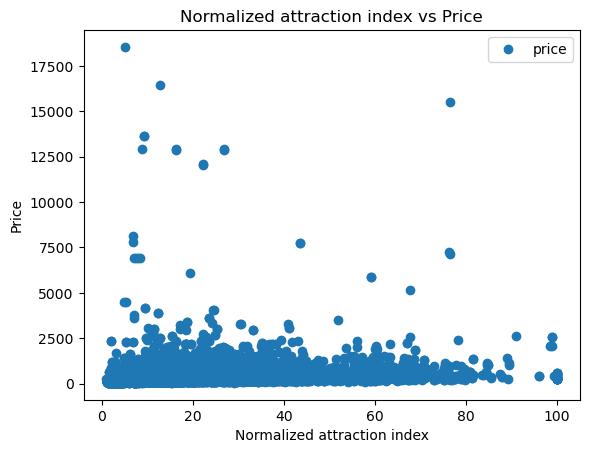

In [12]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
airbnb.plot(x = 'attr_index_norm', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Normalized attraction index vs Price')  
plt.xlabel('Normalized attraction index')  
plt.ylabel('Price')  
plt.show()

#### There are a few outliers on the right side of the plot, representing listings with very high prices.

## Current hypothesis:
## If a listing has a higher attraction index normalized point, the price of that listing is higher than other listings

In [13]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = airbnb['attr_index_norm'].values.reshape(-1,1)
y = airbnb['price'].values.reshape(-1,1)

In [14]:
X

array([[25.2393804 ],
       [42.50790743],
       [21.64084001],
       ...,
       [12.64402212],
       [12.80990501],
       [30.23536291]])

In [15]:
y

array([[296.15994035],
       [288.23748718],
       [211.34308882],
       ...,
       [420.51788612],
       [217.31461229],
       [489.19306663]])

In [16]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 04. Regression analysis

In [17]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [18]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

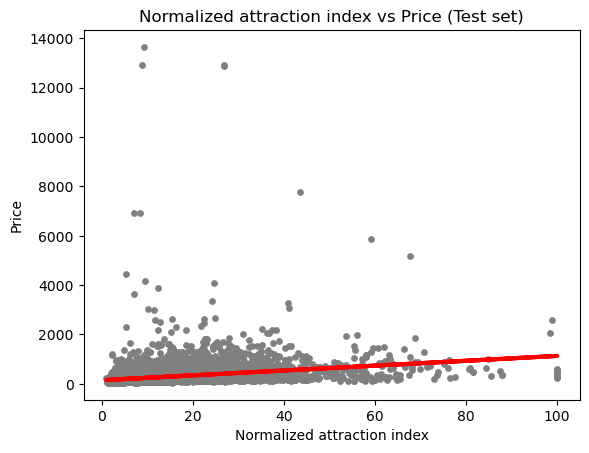

In [20]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Normalized attraction index vs Price (Test set)')
plot_test.xlabel('Normalized attraction index')
plot_test.ylabel('Price')
plot_test.show()

#### The linear model represented by the red regression line doesn't cover all data points perfectly. In the area where the normalized attraction index is low (up to 20), for example, many data points still indicate high prices, which contradicts my hypothesis.
#### There's a weak positive correlation between the normalized attraction index and price. The spread of data points throughout the plot indicates significant variation.

In [21]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [22]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.84288073]]
Mean squared error:  98297.32345186856
R2 score:  0.08530279050629441


#### The slope is approximately 9.84. This means a positive relationship exists between the normalized attraction index and the price. That also means for every one-unit increase in the normalized attraction index, the price tends to increase by around 9.84 units.

#### The MSE is approximately 98,297.32, which suggests that the model’s predictions vary from the actual prices. We can say that regression may not be the best model to represent this data and can’t accurately predict the influence of the normalized attraction index on the price

#### An R2 score of approximately 0.085 indicates that only about 8.5% of the variance in price can be explained by the normalized attraction index. This suggests that other factors not included in the model may also influence price.

In [23]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,276.576345,330.301530
1,167.689739,292.291512
2,213.218619,273.729670
3,171.294249,286.842353
4,295.981110,254.113566
5,173.006336,219.018750
6,156.874664,216.270302
7,632.631187,433.941867
8,210.790995,283.290581
9,299.189114,263.151217


#### There’s quite a difference between the actual and predicted y values. This suggests that the model doesn’t explain the relationship between the “Distance from Metro” and “Price per Unit” variables. The relationship doesn’t follow a single, straight regression line

### Compare how the regression fits the training set

In [24]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train

In [25]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [26]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.84288073]]
Mean squared error:  98377.76663408856
R2 score:  0.08557175075698287


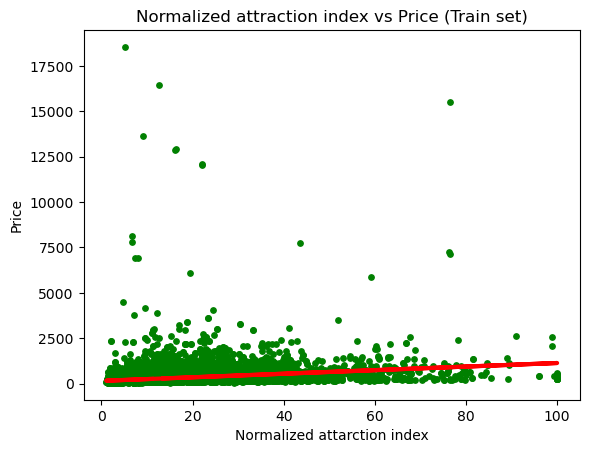

In [27]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Normalized attraction index vs Price (Train set)')
plot_test.xlabel('Normalized attarction index')
plot_test.ylabel('Price')
plot_test.show()

####  The model fits the training set only slightly better than the test set (confirmed by an R2 score of 0.0855). This means the model is not overfitted. However, it also confirms that the relationship you’re exploring isn’t purely linear. 
#### Outliers significantly influence the slope of the regression line, making it less representative of the relationship between the normalized attraction index and price for most listings.

#### The general trend is upward, indicating a positive correlation between the normalized attraction index and price. Finally, I can rule out my hypothesis: "If a listing has a higher attraction index normalized point, the price of that listing is higher than other listings."
####  This statement is only partially true. While the normalized attraction index is an important factor in price formation, there’s still a lot of variance in the data that the linear relationship between these variables can’t explain. That means other factors can also affect the price.

## 05. Create a subset without outliers in 'price' and 'attr_index_norm' columns to train the model

In [28]:
# Identofy IQR, upper outbound and lower outbound for Price
Q1 = airbnb['price'].quantile(0.25)
Q3 = airbnb['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [29]:
# Create a subset without outliers
airbnb_sub = airbnb[(airbnb['price'] >= lower_bound) & (airbnb['price'] <= upper_bound)]

In [30]:
# Identofy IQR, upper outbound and lower outbound for attraction index
Q1_att = airbnb_sub['attr_index_norm'].quantile(0.25)
Q3_att = airbnb_sub['attr_index_norm'].quantile(0.75)
IQR_att = Q3_att - Q1_att
lower_bound_att = Q1_att - 1.5 * IQR_att
upper_bound_att = Q3_att + 1.5 * IQR_att

In [31]:
airbnb_sub2 = airbnb_sub[(airbnb_sub['attr_index_norm'] >= lower_bound_att) & (airbnb_sub['attr_index_norm'] <= upper_bound_att)]

In [32]:
airbnb_sub2.shape

(46406, 17)

C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

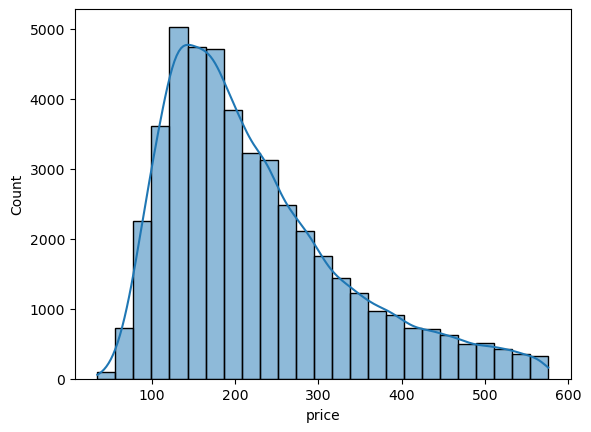

In [33]:
sns.histplot(airbnb_sub2['price'], bins = 25, kde = True)

#### The distribution appears less skewed towards higher prices, suggests that the outliers were primarily on the high-end, influencing the overall shape of the distribution.

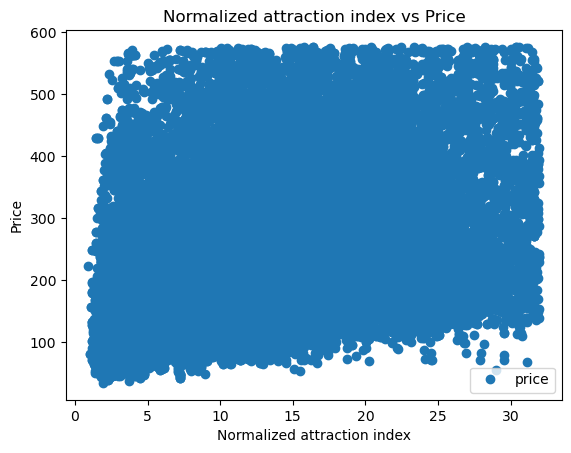

In [34]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
airbnb_sub2.plot(x = 'attr_index_norm', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Normalized attraction index vs Price')  
plt.xlabel('Normalized attraction index')  
plt.ylabel('Price')  
plt.show()

In [35]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X_2 = airbnb_sub2['attr_index_norm'].values.reshape(-1,1)
y_2 = airbnb_sub2['price'].values.reshape(-1,1)

In [36]:
X_2

array([[25.2393804 ],
       [21.64084001],
       [26.39129055],
       ...,
       [12.64402212],
       [12.80990501],
       [30.23536291]])

In [37]:
y_2

array([[296.15994035],
       [211.34308882],
       [298.95610029],
       ...,
       [420.51788612],
       [217.31461229],
       [489.19306663]])

In [38]:
# Split data into a training set and a test set.
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [39]:
# Fit the regression object onto the training set.
regression.fit(X2_train, y2_train)

LinearRegression()

In [40]:
# Predict the values of y using X_2.
y2_predicted = regression.predict(X2_test)

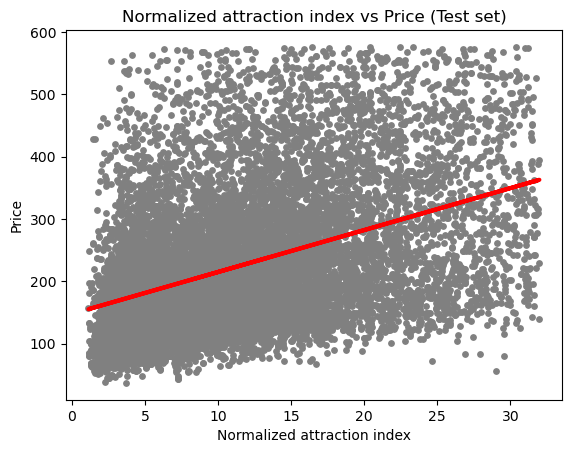

In [41]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test.title('Normalized attraction index vs Price (Test set)')
plot_test.xlabel('Normalized attraction index')
plot_test.ylabel('Price')
plot_test.show()

#### The distribution of points here seems less influenced by extreme values.
#### Compared to the plot with outliers, the red line here seems to fit the data points more closely. This suggests that removing outliers has reduced the influence of extreme values and led to a more accurate representation.

In [42]:
# Create objects that contain the model summary statistics.
rmse_2 = mean_squared_error(y2_test, y2_predicted) # This is the mean squared error
r2_2 = r2_score(y2_test, y2_predicted) # This is the R2 score. 

In [43]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[6.7265494]]
Mean squared error:  10002.43373650512
R2 score:  0.17123274350790707


In [44]:
# Create a dataframe comparing the actual and predicted values of y.
data_2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data_2.head(30)

,Actual,Predicted
0,146.993109,237.182274
1,198.874296,168.785526
2,77.626642,174.042077
3,241.068699,261.115302
4,420.517886,232.807029
5,341.463415,240.628904
6,283.810234,252.902241
7,179.919565,308.138482
8,168.386492,173.035462
9,438.157059,260.406107


#### I created a subset without outliers for price and attraction index columns, the model works better.

#### Even the R2 score from the subset regression is much higher than the score of the complete data set (0.17). The linear line still cannot cover all the data points. 
#### There are differences between the actual value and predicted result, proving that the model does not explain the relationship between the normalized attraction index and the price well, even when the outliers are eliminated.